<div><font size="4"><center><b>Dataset: ds8</b></center></font></div>

In [2]:
import pandas as pd
from scipy import stats

In [3]:
import numpy as np
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/harsh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
#loading the dataset
data = pd.read_csv('/Users/harsh/Desktop/ESE_Dataset/ds8.csv')

In [7]:
data.head()
#in this dataset 1 means fake 0 means real

,title,text,Sources,Date,label
0,Bungalow with private island up for sale for ?...,"A bungalow with a private island, located off ...",Bloomberg,15-02-2017,0
1,Americans react to Bollywood song &# ;Pinga&# ;,A video by YouTube channel &# ;Fomo Daily&# ; ...,YouTube,02-08-2016,0
2,World Toilet Day is celebrated on November 19,The United Nations has designated November 19 ...,United Nations,19-11-2016,0
3,Over 1.57 lakh people affected by Assam floods,Over 1.57 lakh people reportedly have been aff...,Northeast Today,21-07-2016,0
4,Varun Gandhi unhurt after stage collapses,BJP MP Varun Gandhi on Sunday escaped unhurt a...,India Today,13-03-2016,0


In [8]:
#checkikng for missing values and replacing them with null strings 
data.isnull().sum()

title      0
text       0
Sources    0
Date       0
label      0
dtype: int64

In [9]:
data = data.fillna('')

In [ ]:
#first merging title and text
data['content']= data['title']+" "+data['text']

In [11]:
port_stem = PorterStemmer()
stop_words = set(stopwords.words('english'))
pattern = re.compile('[^a-zA-Z]')

def stemming(content, pattern, stop_words, stemmer):
  stem_content = pattern.sub(' ', content)
  stem_content = stem_content.lower().split()
  stem_content = [stemmer.stem(word) for word in stem_content if word not in stop_words]
  stem_content = ' '.join(stem_content)
  return stem_content

# applying the optimized stemming function to the content
data['content'] = data['content'].apply(stemming, args=(pattern, stop_words, port_stem))

In [13]:
#separating the data
X= data['content'].values
Y= data['label'].values

In [16]:
#converting the texts to numerical values
vectorizer= TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

<AxesSubplot: >

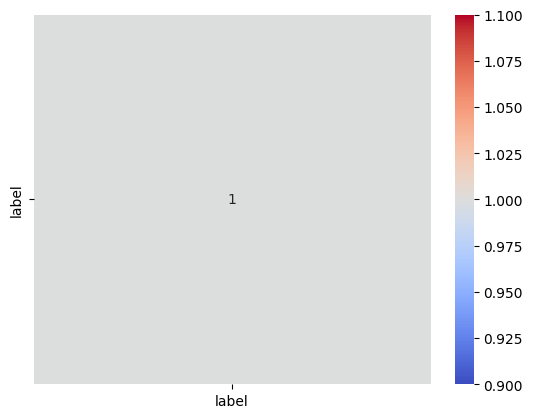

In [18]:
#feature selection
import seaborn as sns
vars_to_corr= ['content','label']


corr_matrix = data[vars_to_corr].corr(numeric_only=True)

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

In [19]:
#splitting the data for training and testing 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [20]:
#training the model.  Logistic Regression
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [21]:
X_train_pred = model.predict(X_train)
train_data_accuracy= accuracy_score(X_train_pred,Y_train)
print(train_data_accuracy)

0.994723774053383


In [22]:
#checking accuracy on test set
X_test_pred = model.predict(X_test)
test_pred_accuracy= accuracy_score(X_test_pred,Y_test)
print(test_pred_accuracy)

0.9921971980847668


In [23]:
#making a predictive system
X_news= X_test[0]
pred= model.predict(X_news)

if(pred==0):
  print("real news")
else:
  print("fake news")

real news


In [37]:
#make 9 other models and compare the accuracy of each model and with different datasets

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [25]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(Y_test, dt_pred)
print(dt_acc)

0.9820003546728143


In [26]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(Y_test, rf_pred)
print(rf_acc)

0.9969852810782054


In [27]:
# SVM
svm = SVC()
svm.fit(X_train, Y_train)
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(Y_test, svm_pred)
print(svm_acc)

0.9956552580244724


In [28]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(Y_test, knn_pred)
print(knn_acc)

0.9084944139031743


In [29]:
#Passive Aggressive classifier
from sklearn.linear_model import PassiveAggressiveClassifier

model=PassiveAggressiveClassifier(max_iter=500)
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
pac_acc=accuracy_score(Y_test,y_pred)
print(pac_acc)

0.9945912395814861


In [30]:
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.toarray(), Y, test_size=0.2, random_state=42)

In [32]:
# Neural Networks
nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
nn.fit(X_train, y_train)
nn_pred = nn.predict(X_test)
nn_acc = accuracy_score(y_test, nn_pred)
print('Neural Networks accuracy:', nn_acc)

Neural Networks accuracy: 0.9960099308388012


In [ ]:
# XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)
print('XGBoost accuracy:', xgb_acc)

XGBoost accuracy: 0.9943252349707395


In [ ]:
# Bagging
bg = BaggingClassifier()
bg.fit(X_train, y_train)
bg_pred = bg.predict(X_test)
bg_acc = accuracy_score(y_test, bg_pred)
print('Bagging accuracy:', bg_acc)

Bagging accuracy: 0.9855470828161021


In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)
print('Naive Bayes accuracy:', nb_acc)

Naive Bayes accuracy: 0.8467813442099663


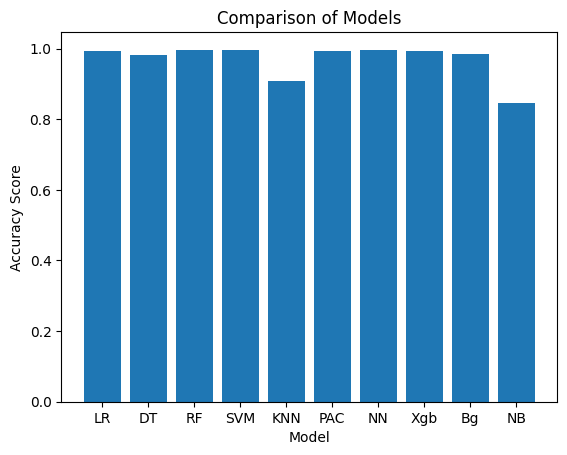

In [2]:
import matplotlib.pyplot as plt

# Create a dictionary of accuracy scores for each model

accuracy_scores = {'LR': test_pred_accuracy, 'DT': dt_acc, 'RF': rf_acc, 'SVM':svm_acc, 'KNN':knn_acc, 'PAC':pac_acc, 'NN':nn_acc,'Xgb':xgb_acc,'Bg':bg_acc, 'NB':nb_acc}

# Create a bar chart of the accuracy scores
plt.bar(accuracy_scores.keys(), accuracy_scores.values())

# Add labels and title to the plot
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Models')

# Display the plot
plt.show()

<font size="4">From the above graph it can be noted that RF has the largest accuracy=0.9969852810782054</font>

In [5]:
#statistical testing on the dataset
import numpy as np

In [9]:
import scipy.stats as stats

models = ['LR', 'DT', 'RF', 'SVM', 'KNN', 'PAC', 'NN', 'Xgb', 'Bg', 'NB']
scores = [test_pred_accuracy, dt_acc, rf_acc, svm_acc, knn_acc, pac_acc, nn_acc, xgb_acc, bg_acc, nb_acc]
# Convert any scalar values to one-element arrays
scores = [np.array([score]) if np.ndim(score) == 0 else score for score in scores]

# Perform Friedman test
f_value, p_value = stats.friedmanchisquare(*scores)

# Print results
print("Friedman test")
print("--------------")
print("F-value: ", f_value)
print("p-value: ", p_value)

# Interpret results
if p_value < 0.05:
    print("There is a significant difference in the performance of the models.")
else:
    print("There is no significant difference in the performance of the models.")

Friedman test
--------------
F-value:  9.0
p-value:  0.43727418891386693
There is no significant difference in the performance of the models.


In [10]:
import numpy as np
from scipy.stats import chisquare

scores = [test_pred_accuracy, dt_acc, rf_acc, svm_acc, knn_acc, pac_acc, nn_acc, xgb_acc, bg_acc, nb_acc]

expected_score = np.mean(scores)

# Calculate the chi-squared test statistic and p-value
chi_stat, p_value = chisquare(scores, f_exp=expected_score)

print("Chi-squared test results")
print("-------------------------")
print("Chi-squared statistic:", chi_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("There is a significant difference in the test accuracy scores of the models.")
else:
    print("There is no significant difference in the test accuracy scores of the models.")

Chi-squared test results
-------------------------
Chi-squared statistic: 0.023830660354671806
p-value: 0.9999999999583719
There is no significant difference in the test accuracy scores of the models.


In [11]:
import numpy as np
from scipy.stats import ttest_rel

scores = [test_pred_accuracy, dt_acc, rf_acc, svm_acc, knn_acc, pac_acc, nn_acc, xgb_acc, bg_acc, nb_acc]

# Perform the paired t-test
t_stat, p_value = ttest_rel(scores[:-1], scores[1:])

print("Paired t-test results")
print("----------------------")
print("t-statistic:", t_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("There is a significant difference in the test accuracy scores of the models.")
else:
    print("There is no significant difference in the test accuracy scores of the models.")

Paired t-test results
----------------------
t-statistic: 0.762507686228058
p-value: 0.46764140533922116
There is no significant difference in the test accuracy scores of the models.
